## 1. Import all necessary visualization libraries and load into dataset

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data_filepath = r"C:\Users\quynh\OneDrive\Documents\DSA 330\Final Project\train (1).csv"
data = pd.read_csv(data_filepath)

**Print out first few rows to confirm successful load in**

In [7]:
print(data.head())

         id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT

## 2. Narrow Down Data

In [165]:
demographics = data[['Basic_Demos-Enroll_Season','Basic_Demos-Age','Basic_Demos-Sex']]
physical_measures = data[['Physical-Season','Physical-BMI','Physical-Height','Physical-Weight','Physical-Waist_Circumference','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP']]
sds = data[['SDS-Season','SDS-SDS_Total_Raw','SDS-SDS_Total_T']]

## 3. Inspect Data and Clean Data

In [77]:
demographics.describe(include = 'number')

,Basic_Demos-Age,Basic_Demos-Sex
count,3960.000000,3960.000000
mean,10.433586,0.372727
std,3.574648,0.483591
min,5.000000,0.000000
25%,8.000000,0.000000
50%,10.000000,0.000000
75%,13.000000,1.000000
max,22.000000,1.000000


In [79]:
physical_measures.describe(include = 'number')

,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP
count,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000
mean,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074
std,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225
min,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000
25%,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000
50%,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000
75%,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000
max,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000


In [81]:
sds.describe(include = 'number')

,SDS-SDS_Total_Raw,SDS-SDS_Total_T
count,2609.000000,2606.000000
mean,41.088923,57.763622
std,10.427433,13.196091
min,17.000000,38.000000
25%,33.000000,47.000000
50%,39.000000,55.000000
75%,46.000000,64.000000
max,96.000000,100.000000


**Check for null or missing values**

In [111]:
# Calculate percetange of missing data 
nanDemos = demographics.isnull()
print(nanDemos.mean() * 100)

Basic_Demos-Enroll_Season    0.0
Basic_Demos-Age              0.0
Basic_Demos-Sex              0.0
dtype: float64


In [113]:
nanPhys = physical_measures.isnull()
print(nanPhys.mean() * 100)

Physical-Season                 16.414141
Physical-BMI                    23.686869
Physical-Height                 23.560606
Physical-Weight                 22.323232
Physical-Waist_Circumference    77.323232
Physical-Diastolic_BP           25.404040
Physical-HeartRate              25.075758
Physical-Systolic_BP            25.404040
dtype: float64


Over 30%: Physical-Waist_Circumference (remove)

In [117]:
nanSDS = sds.isnull()
print(nanSDS.mean() * 100)

SDS-Season           33.888889
SDS-SDS_Total_Raw    34.116162
SDS-SDS_Total_T      34.191919
dtype: float64


All over 30% (remove or impute)

**View count of occurances of each unique value in categorical data**

In [145]:
demographics['Basic_Demos-Enroll_Season'].value_counts()

Basic_Demos-Enroll_Season
Spring    1127
Winter     997
Summer     970
Fall       866
Name: count, dtype: int64

In [147]:
demographics['Basic_Demos-Age'].value_counts()

Basic_Demos-Age
8     490
9     467
7     436
10    420
6     369
11    334
12    291
13    236
14    200
15    178
16    151
17    114
5     112
18     74
21     29
19     27
20     24
22      8
Name: count, dtype: int64

In [149]:
demographics['Basic_Demos-Sex'].value_counts()

Basic_Demos-Sex
0    2484
1    1476
Name: count, dtype: int64

More males than females

In [159]:
sds['SDS-Season'].value_counts()

SDS-Season
Spring    712
Winter    652
Summer    635
Fall      619
Name: count, dtype: int64

Conclusion: More children tested for all categories in the Spring

**Check for duplicate rows**

In [173]:
data.duplicated().sum()

0

## Data Visualization

### Demographics

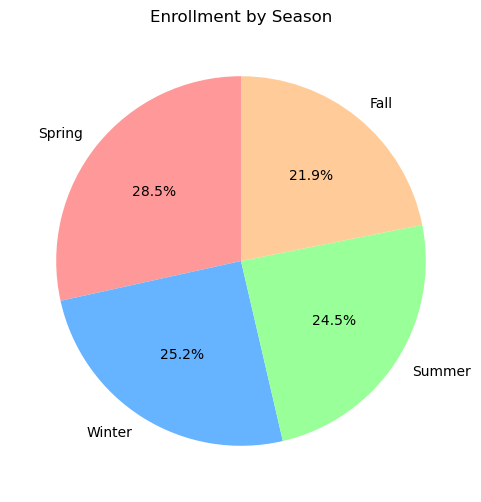

In [192]:
demosSeasonCount = demographics['Basic_Demos-Enroll_Season'].value_counts()
plt.figure(figsize=(6, 6))
demosSeasonCount.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Enrollment by Season")
plt.ylabel("")  
plt.show()

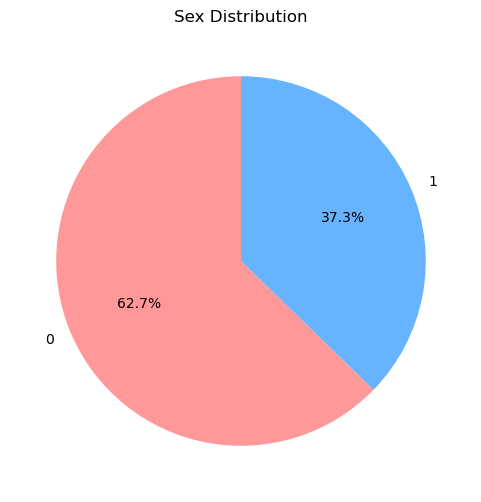

In [194]:
demosSexCount = demographics['Basic_Demos-Sex'].value_counts()
plt.figure(figsize=(6, 6))
demosSexCount.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Sex Distribution")
plt.ylabel("")
plt.show()

0 = males 
1 = females

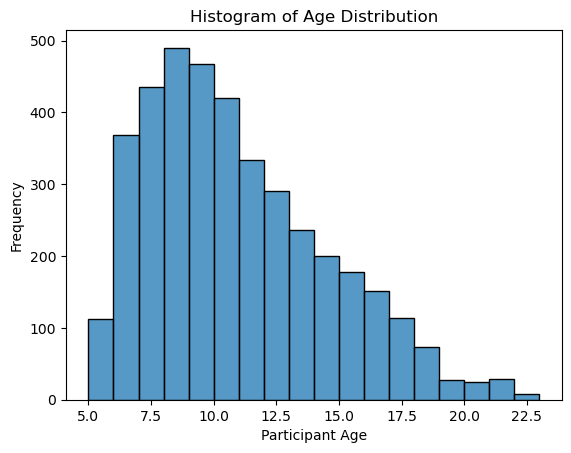

In [205]:
# Initial gap in data, but resolved to account for only whole integers
sns.histplot(demographics['Basic_Demos-Age'], bins=range(int(demographics['Basic_Demos-Age'].min()), int(demographics['Basic_Demos-Age'].max()) + 2), kde=False)
plt.xlabel('Participant Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')
plt.show()

Skewed Data: More younger children in study

### Physical Measures

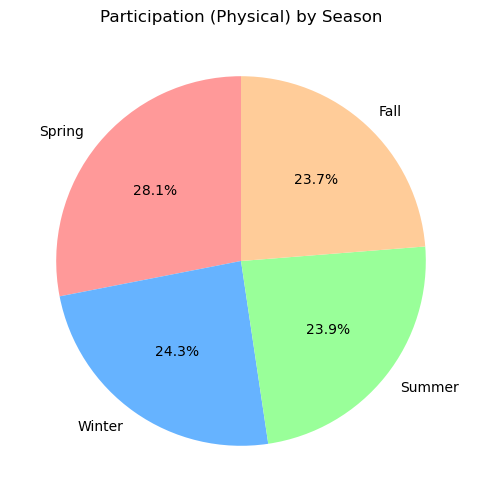

In [213]:
physSeasonCount = physical_measures['Physical-Season'].value_counts()
plt.figure(figsize=(6, 6))
physSeasonCount.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Participation (Physical) by Season")
plt.ylabel("")  
plt.show()

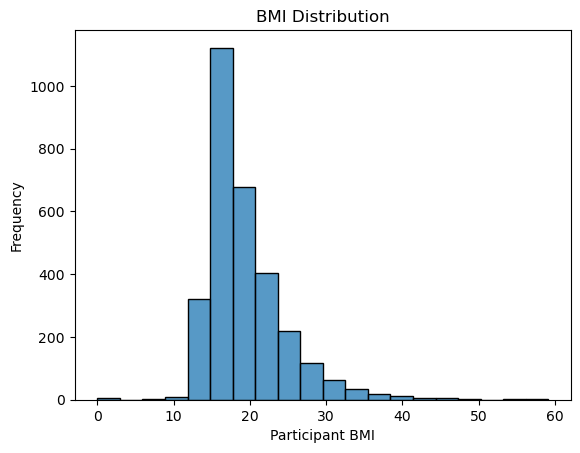

In [215]:
sns.histplot(physical_measures['Physical-BMI'], bins=20, kde=False)
plt.xlabel('Participant BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

Very concetrated: upper 10's - 20

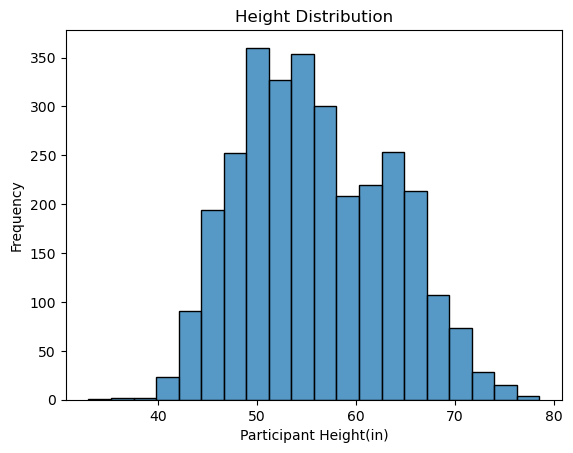

In [219]:
sns.histplot(physical_measures['Physical-Height'], bins=20, kde=False)
plt.xlabel('Participant Height(in)')
plt.ylabel('Frequency')
plt.title('Height Distribution')
plt.show()

Looks normal

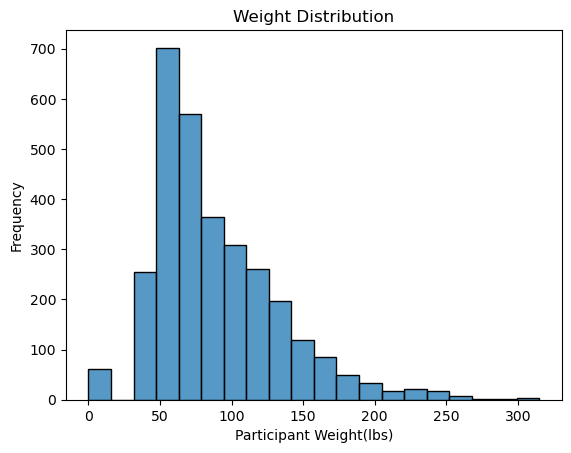

In [222]:
sns.histplot(physical_measures['Physical-Weight'], bins=20, kde=False)
plt.xlabel('Participant Weight(lbs)')
plt.ylabel('Frequency')
plt.title('Weight Distribution')
plt.show()

Looks skewed (could be because of younger age)

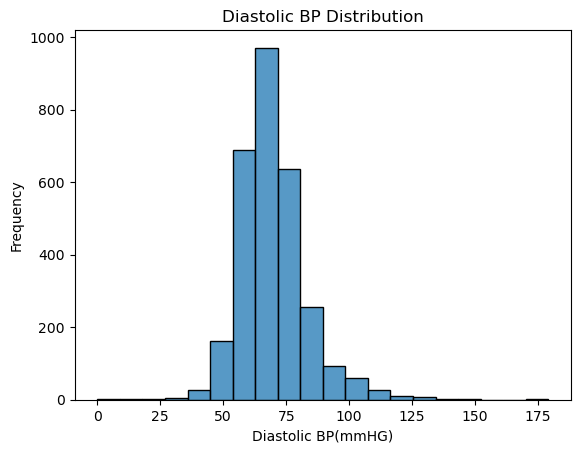

In [231]:
sns.histplot(physical_measures['Physical-Diastolic_BP'], bins=20, kde=False)
plt.xlabel('Diastolic BP(mmHG)')
plt.ylabel('Frequency')
plt.title('Diastolic BP Distribution')
plt.show()

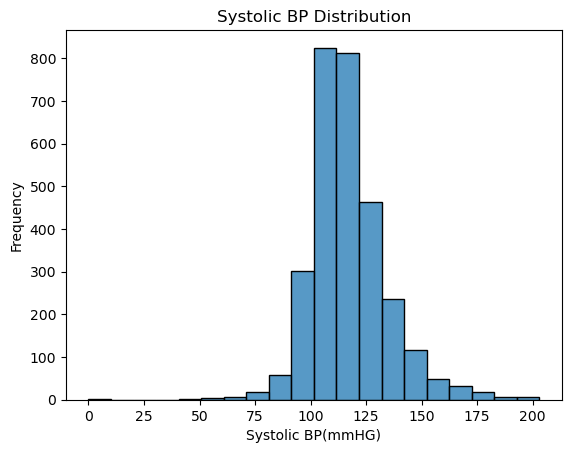

In [229]:
sns.histplot(physical_measures['Physical-Systolic_BP'], bins=20, kde=False)
plt.xlabel('Systolic BP(mmHG)')
plt.ylabel('Frequency')
plt.title('Systolic BP Distribution')
plt.show()

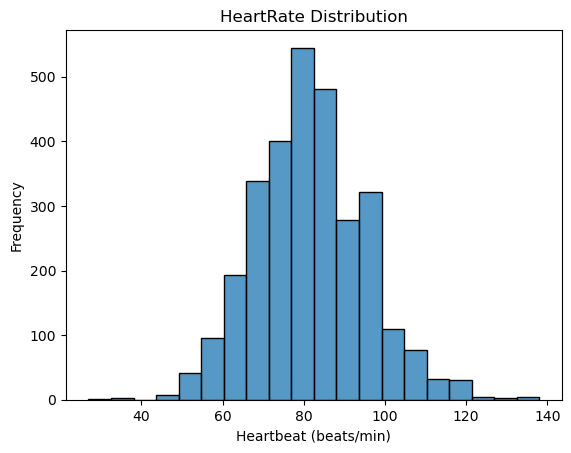

In [274]:
sns.histplot(physical_measures['Physical-HeartRate'], bins=20, kde=False)
plt.xlabel('Heartbeat (beats/min)')
plt.ylabel('Frequency')
plt.title('HeartRate Distribution')
plt.show()

### Sleep Distubance Scale

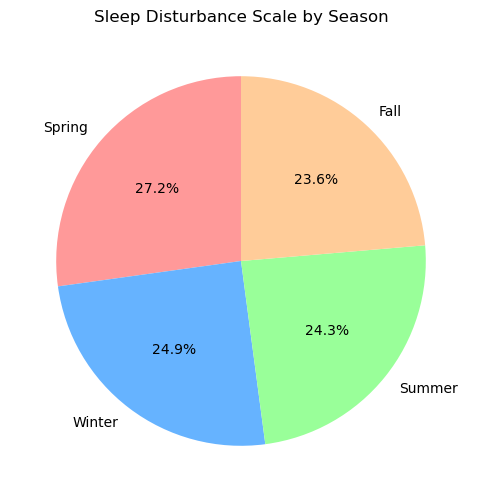

In [235]:
sds_seasons = sds['SDS-Season'].value_counts()
plt.figure(figsize=(6, 6))
sds_seasons.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Sleep Disturbance Scale by Season")
plt.ylabel("")
plt.show()

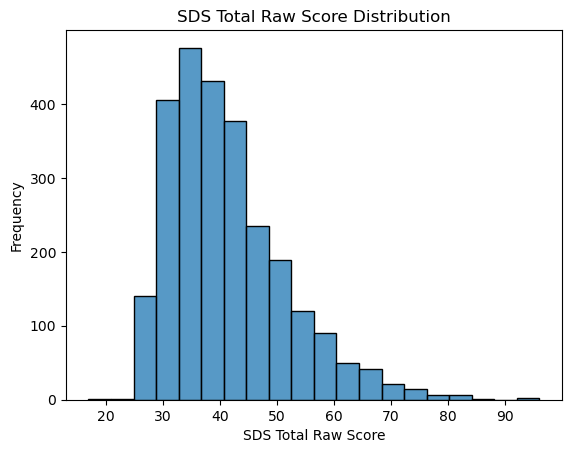

In [241]:
sns.histplot(sds['SDS-SDS_Total_Raw'], bins=20, kde=False)
plt.xlabel('SDS Total Raw Score')
plt.ylabel('Frequency')
plt.title('SDS Total Raw Score Distribution')
plt.show()

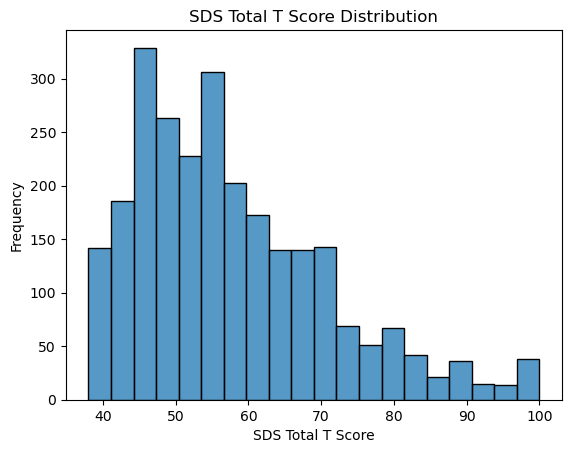

In [243]:
sns.histplot(sds['SDS-SDS_Total_T'], bins=20, kde=False)
plt.xlabel('SDS Total T Score')
plt.ylabel('Frequency')
plt.title('SDS Total T Score Distribution')
plt.show()

## Check for Outliers: Boxplots

**Demographics**

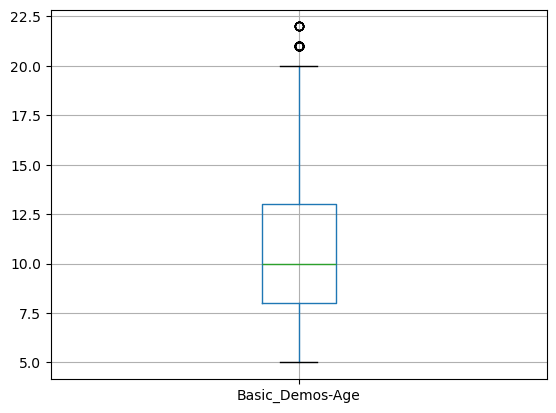

In [252]:
demographics.boxplot(column='Basic_Demos-Age')  
plt.show()

Age: high outliers; older kids 

**Physical Measures**

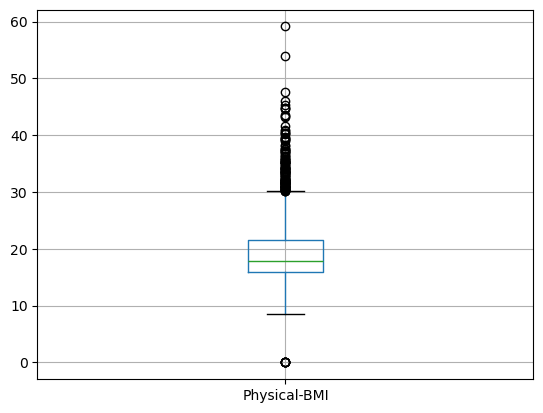

In [261]:
physical_measures.boxplot(column='Physical-BMI')  
plt.show()

BMI: Lots of outliers??, overweight

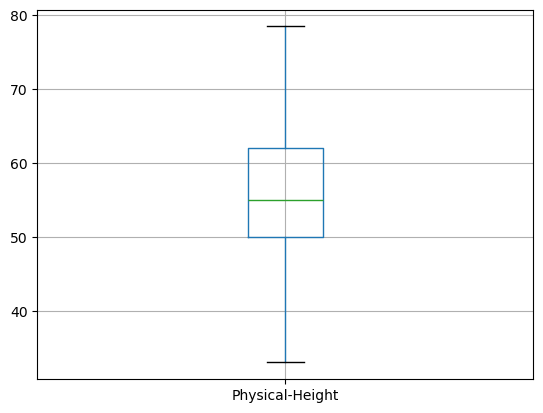

In [264]:
physical_measures.boxplot(column='Physical-Height')  
plt.show()

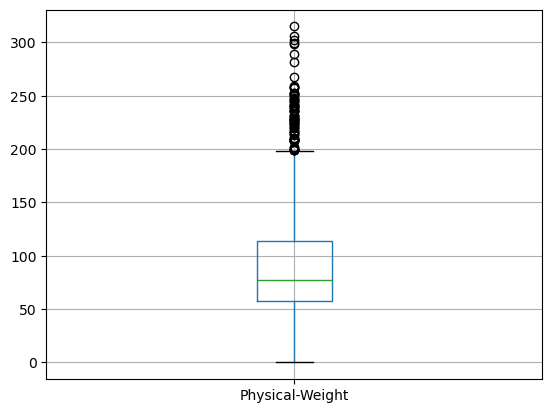

In [266]:
physical_measures.boxplot(column='Physical-Weight')  
plt.show()

Weight: Lots of high outliers, overweight 

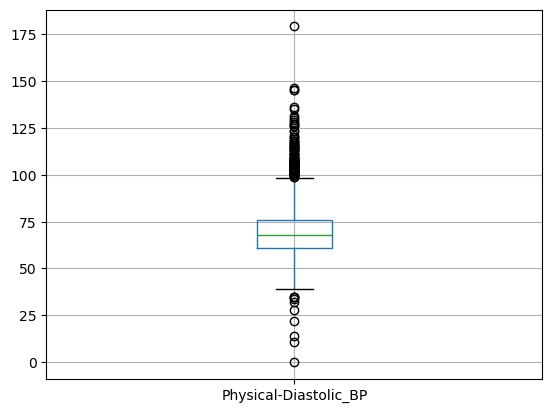

In [272]:
physical_measures.boxplot(column='Physical-Diastolic_BP')  
plt.show()

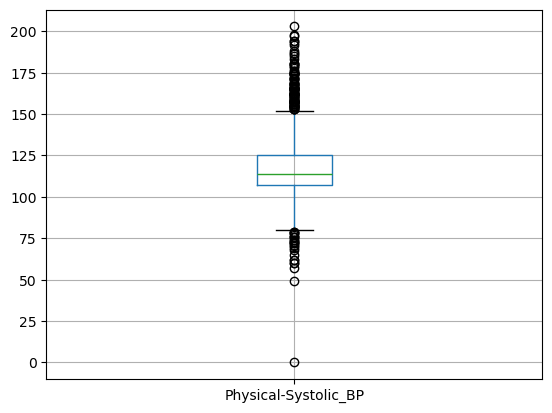

In [276]:
physical_measures.boxplot(column='Physical-Systolic_BP')  
plt.show()

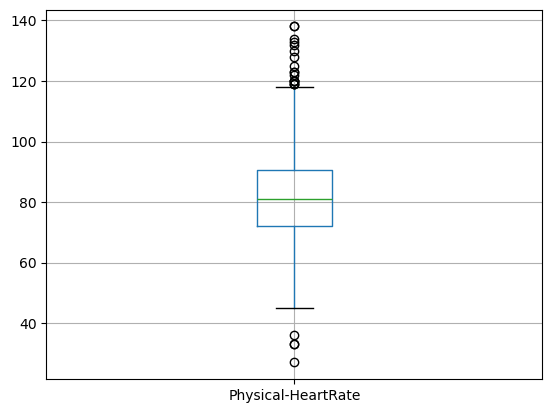

In [280]:
physical_measures.boxplot(column='Physical-HeartRate')  
plt.show()

### Bivariate Analysis

C:\Users\quynh\AppData\Local\Temp\ipykernel_3876\3480665118.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Age_Group', y='Physical-BMI', palette="Set2")


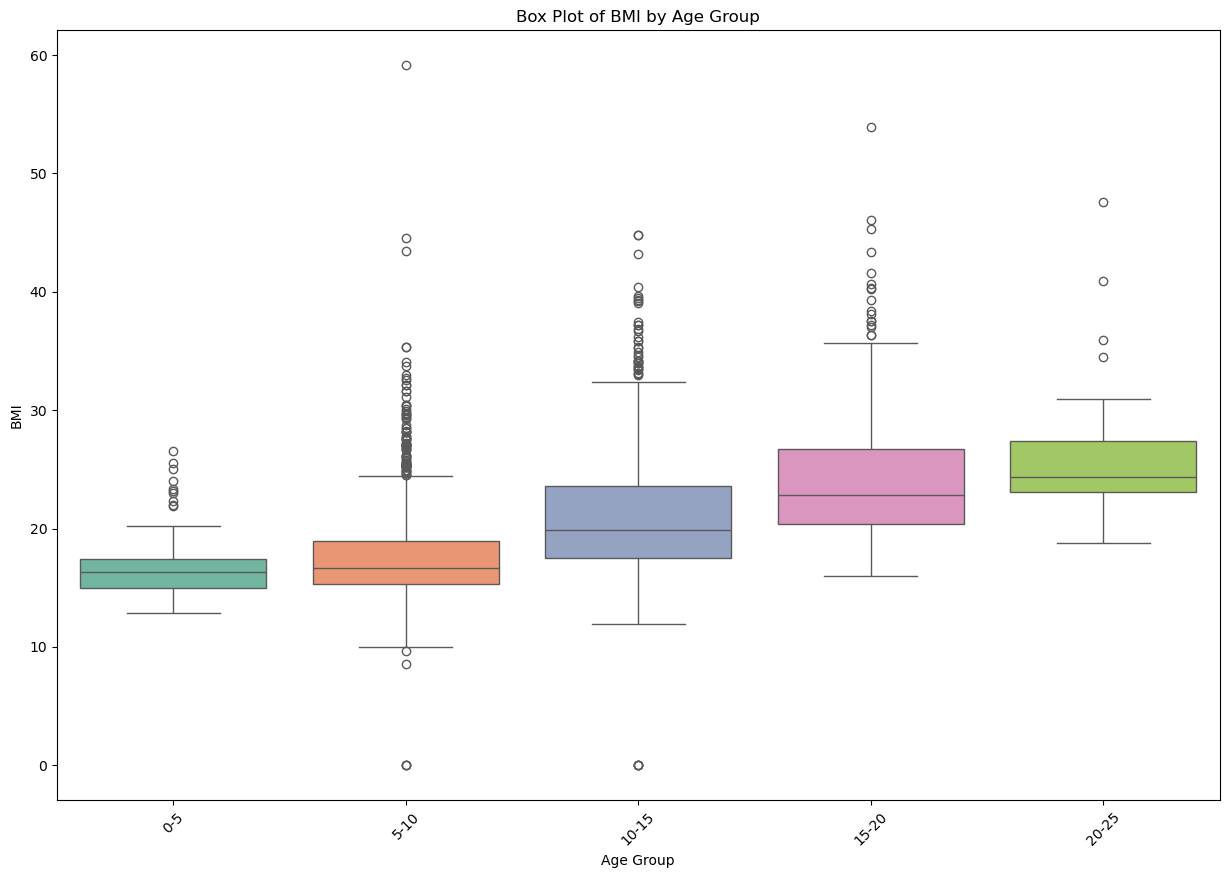

In [285]:
# Boxplots for Age vs. BMI
# Different age groups
bins = [0,5,10,15,20,25]
labels = ['0-5','5-10','10-15','15-20','20-25']
data['Age_Group'] = pd.cut(demographics['Basic_Demos-Age'], bins=bins, labels=labels)

plt.figure(figsize=(15, 10))
sns.boxplot(data=data, x='Age_Group', y='Physical-BMI', palette="Set2")
plt.title("Box Plot of BMI by Age Group")
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.show()

BMI increases with age

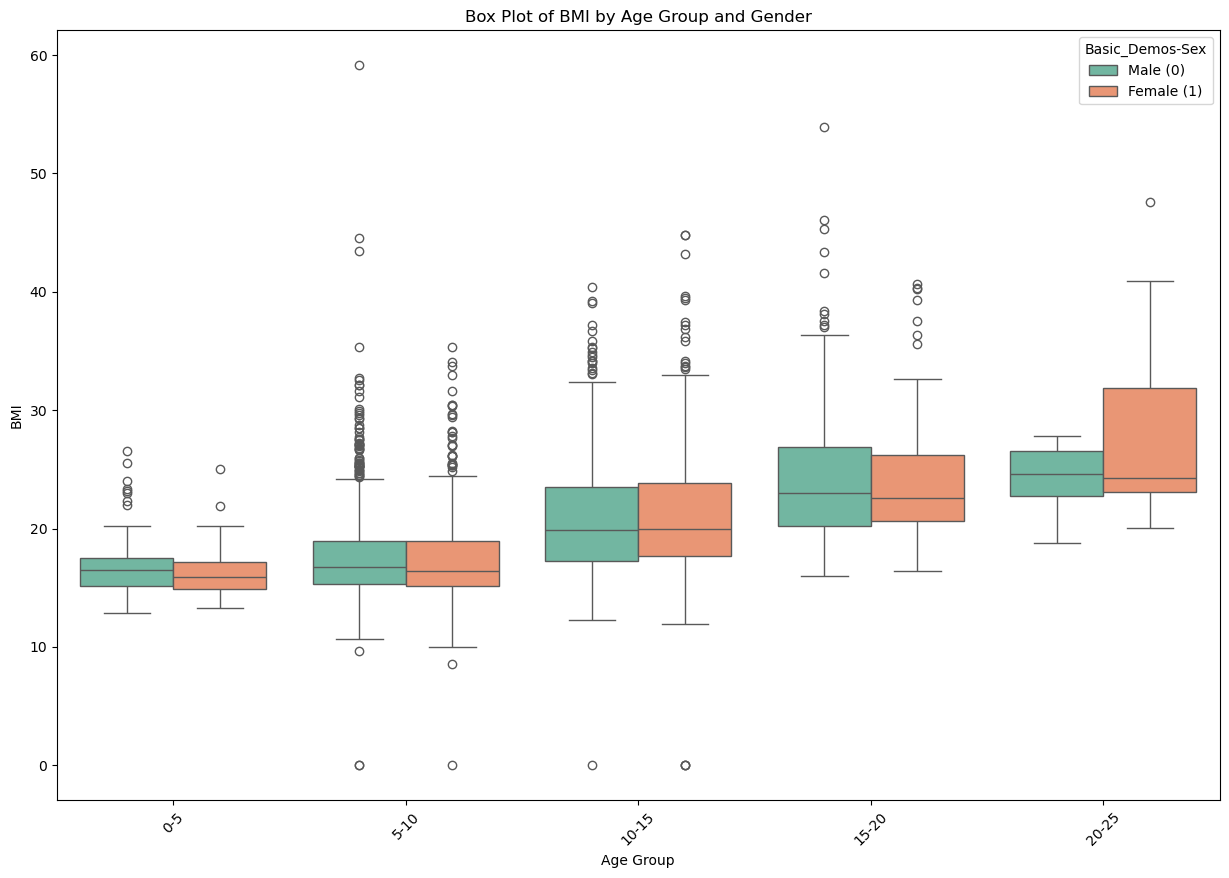

In [296]:
bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25']
data['Age_Group'] = pd.cut(demographics['Basic_Demos-Age'], bins=bins, labels=labels)

# Plotting boxplots split by gender (0 = male, 1 = female)
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=data, x='Age_Group', y='Physical-BMI', hue='Basic_Demos-Sex', palette="Set2")

# Customizing the plot
plt.title("Box Plot of BMI by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.legend(title='Basic_Demos-Sex', labels=['Male (0)', 'Female (1)'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Male (0)', 'Female (1)'], title='Basic_Demos-Sex')

# Show the plot
plt.show()

For older participants, females have a higher BMI than males

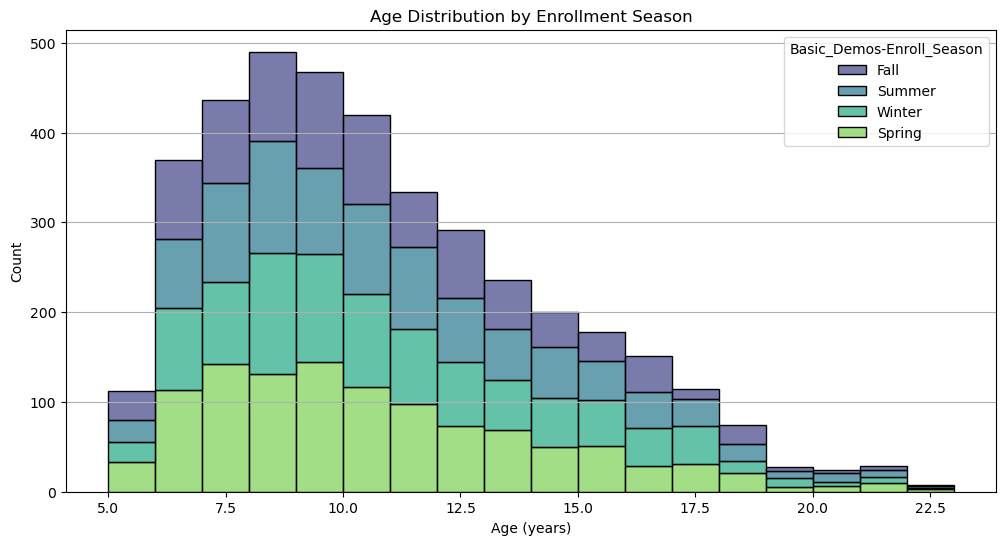

In [303]:
# Histogram for Age by Enrollment Season
age_min = int(data['Basic_Demos-Age'].min())  # Minimum age (rounded down to the nearest integer)
age_max = int(data['Basic_Demos-Age'].max()) + 1  # Maximum age (rounded up to the next integer)

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Basic_Demos-Age', hue='Basic_Demos-Enroll_Season', 
             bins=range(age_min, age_max + 1), multiple='stack', alpha=0.7, palette='viridis')

plt.title('Age Distribution by Enrollment Season')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()

C:\Users\quynh\AppData\Local\Temp\ipykernel_3876\2292263524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Basic_Demos-Sex', y='SDS-SDS_Total_T', palette='Set2')


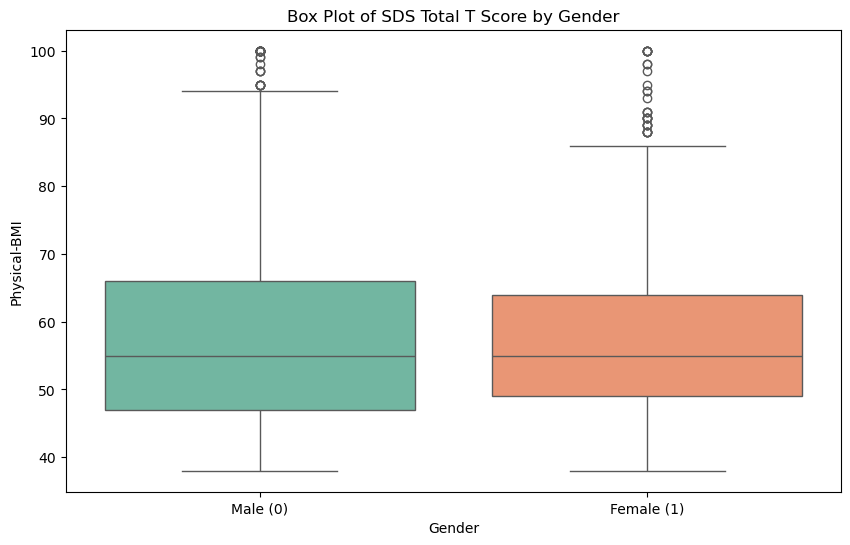

In [311]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Basic_Demos-Sex', y='SDS-SDS_Total_T', palette='Set2')

# Customizing the plot
plt.title('Box Plot of SDS Total T Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Physical-BMI')

# Adjusting x-ticks for better clarity (optional)
plt.xticks([0, 1], ['Male (0)', 'Female (1)'])

# Show the plot
plt.show()

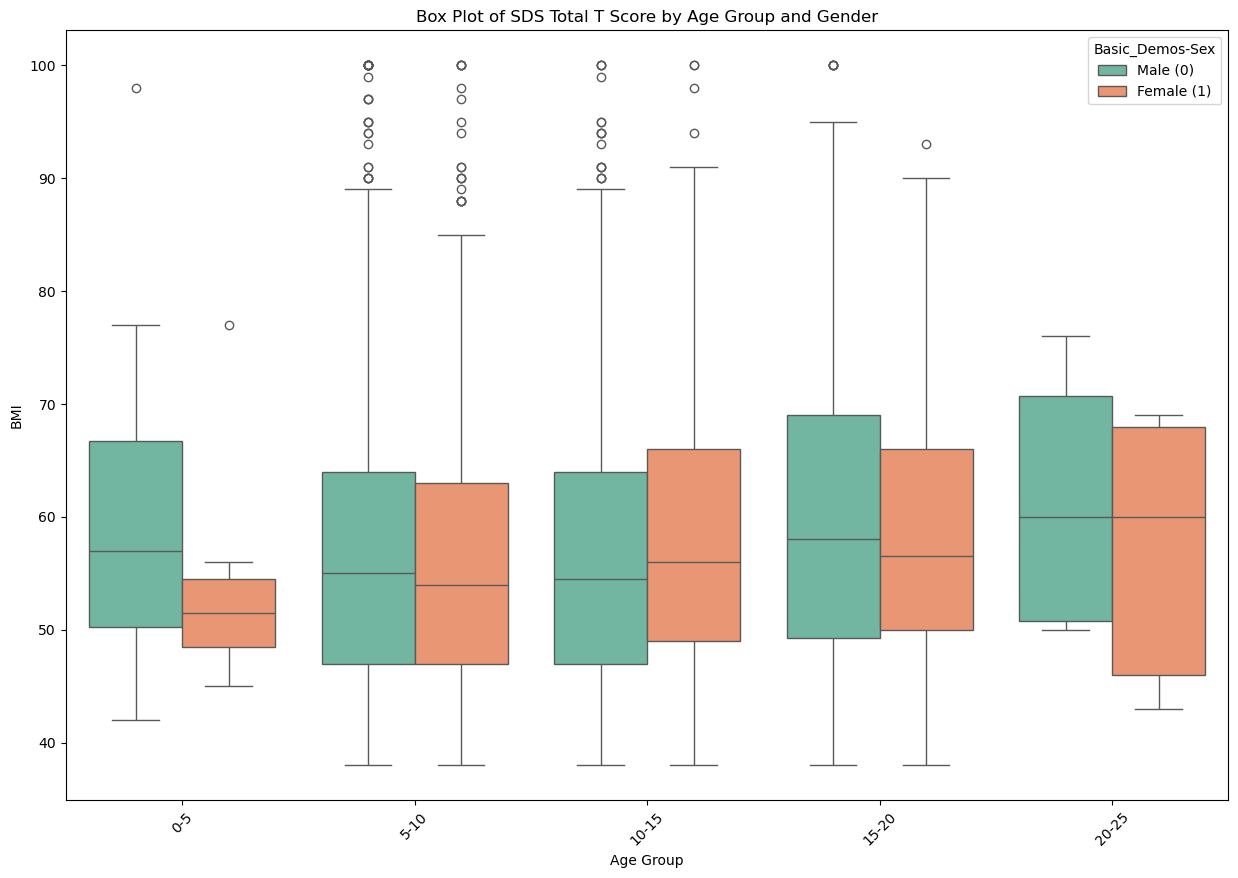

In [315]:
bins = [0, 5, 10, 15, 20, 25]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25']
data['Age_Group'] = pd.cut(demographics['Basic_Demos-Age'], bins=bins, labels=labels)

# Plotting boxplots split by gender (0 = male, 1 = female)
plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=data, x='Age_Group', y='SDS-SDS_Total_T', hue='Basic_Demos-Sex', palette="Set2")

# Customizing the plot
plt.title("Box Plot of SDS Total T Score by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.legend(title='Basic_Demos-Sex', labels=['Male (0)', 'Female (1)'])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Male (0)', 'Female (1)'], title='Basic_Demos-Sex')

# Show the plot
plt.show()

Youngest participants who were male had a wider range and were disturbed more than females

C:\Users\quynh\AppData\Local\Temp\ipykernel_3876\3098834292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Basic_Demos-Enroll_Season', y='Physical-BMI', palette='Set2')


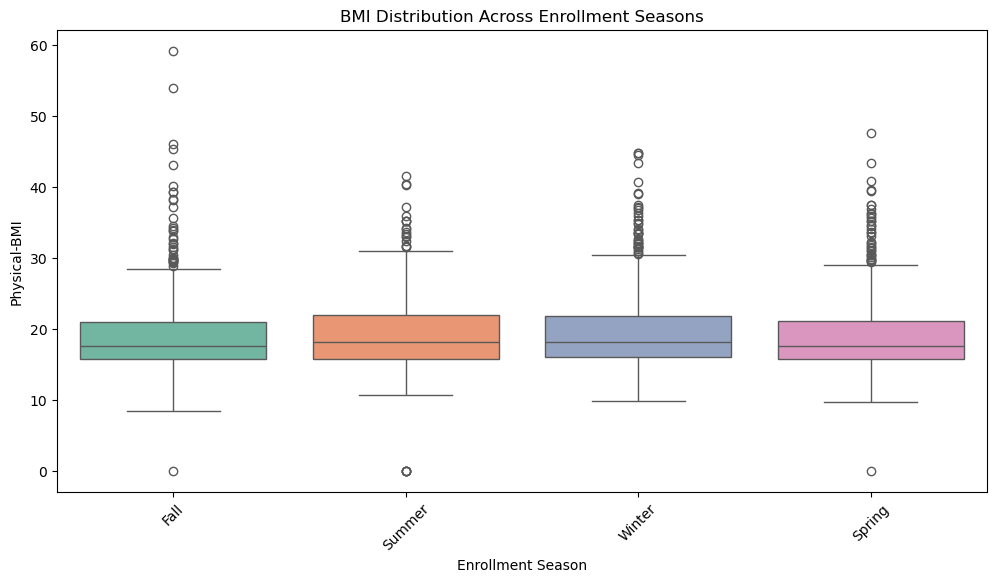

In [318]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Basic_Demos-Enroll_Season', y='Physical-BMI', palette='Set2')

plt.title('BMI Distribution Across Enrollment Seasons')
plt.xlabel('Enrollment Season')
plt.ylabel('Physical-BMI')
plt.xticks(rotation=45) 

plt.show()